In [1]:
import sys
import os
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
sys.path.append('..')
from src.utils.data import getPandas, getConfig, getDict, getGraph
from process.preproc_img import ImageStatistics
os.chdir('../..')
os.getcwd()

'/home/biobot/disk/ldopa'

In [2]:
data = getPandas('pat_data')
conf = getConfig('data')
roi_info = getDict('aal')
train_idx = conf['indices']['pat']['train']
test_idx = conf['indices']['pat']['test']
train_keys = data.iloc[train_idx]['KEY'].tolist()
test_keys = data.iloc[test_idx]['KEY'].tolist()
all_keys = train_keys + test_keys
all_idx = train_idx + test_idx
nodal_data = getPandas('pat_nodal')
roi_list = list(roi_info.keys())

In [3]:
train_data = nodal_data[nodal_data['KEY'].isin(train_keys)]
test_data = nodal_data[nodal_data['KEY'].isin(test_keys)]
good_keys = data.iloc[all_idx].loc[data.iloc[all_idx]['CAT']==1]['KEY']
bad_keys = data.iloc[all_idx].loc[data.iloc[all_idx]['CAT']==0]['KEY']
train_good = train_data[train_data['KEY'].isin(good_keys)]
train_bad = train_data[train_data['KEY'].isin(bad_keys)]
test_good = test_data[test_data['KEY'].isin(good_keys)]
test_bad = test_data[test_data['KEY'].isin(bad_keys)]

In [6]:
col_list = train_good.columns.drop(['KEY'])
for col in col_list:
    p = ttest_ind(train_good[col], train_bad[col])[1]
    if p < 0.05:
        print('{}: {}'.format(col, p))

F1G_degree: 0.012247846883719068
LPCG_degree: 0.016507453567220713
NLD_degree: 0.04619731216298622
THAD_degree: 0.012667186776021412
F1G_dc: 0.012247846883718999
LPCG_dc: 0.016507453567220855
NLD_dc: 0.046197312162985796
THAD_dc: 0.012667186776020961
FAG_bc: 0.009175791285791848
FMOG_bc: 0.03071533678404945
CINMG_bc: 0.042217691697209125
PARA_HIPPOD_bc: 0.045928052439204135
P2D_bc: 0.04555325012368301
NLD_bc: 0.04868504805275246
FAG_ncc: 0.002922736105493037
CIPD_ncc: 0.04383344733663839
O1D_ncc: 0.03868574624513074
O2G_ncc: 0.01688172823956159
PAD_ncc: 0.02213399737438828


In [5]:
col_list = test_good.columns.drop(['KEY'])
for col in col_list:
    p = ttest_ind(test_good[col], test_bad[col])[1]
    if p < 0.05:
        print('{}: {}'.format(col, p))

F1G_degree: 0.009826721567326783
F2OG_degree: 0.016153133349090843
F3OPG_degree: 0.0022642110254346287
P1D_degree: 0.03391643274973924
GSMD_degree: 0.0454847998716784
GAG_degree: 0.03607488830269359
LPCG_degree: 0.04453042881516422
T3D_degree: 0.025425858990705194
F1G_dc: 0.00982672156732673
F2OG_dc: 0.01615313334909103
F3OPG_dc: 0.002264211025434591
P1D_dc: 0.033916432749739406
GSMD_dc: 0.04548479987167828
GAG_dc: 0.03607488830269406
LPCG_dc: 0.04453042881516343
T3D_dc: 0.025425858990705385
F1G_bc: 0.01773785007041181
F1OD_bc: 0.04850371605729366
SMAD_bc: 0.04105282856506892
COBG_bc: 0.013710842284953033
FUSID_bc: 0.04298408478898741
P1D_bc: 0.023772770296602012
HESCHLG_bc: 0.03410101595615477
T1G_bc: 0.009944741766994152
T3D_bc: 0.040830018665702066
FMOG_ncc: 0.012278413082093431
CIAG_ncc: 0.021118617552311286
O2G_ncc: 0.02832491241101243
PAD_ncc: 0.019234290836057644
P2G_ncc: 0.02063848600250957
LPCD_ncc: 0.0165564392270468
NCD_ncc: 0.041130078915433604


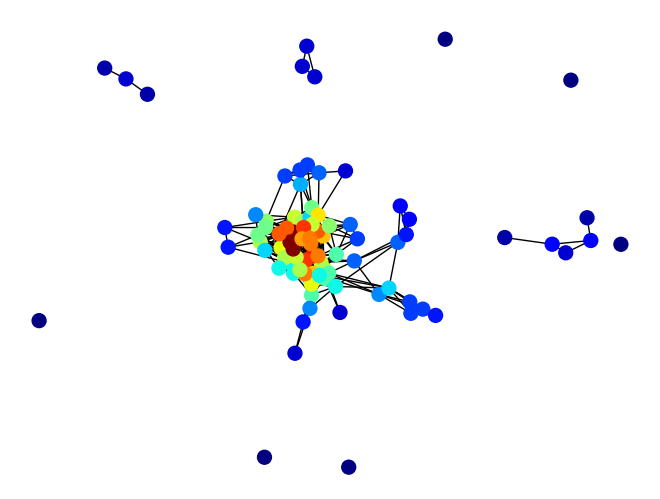

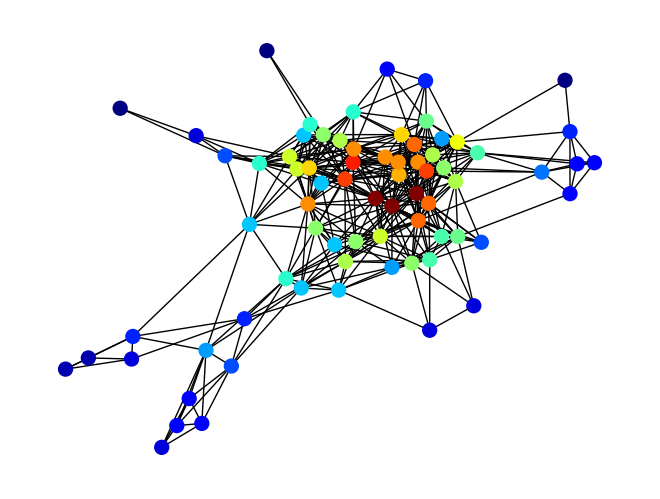

In [6]:
gg = nx.Graph()
key = train_keys[0]
edges = getGraph(key)
test_thres = 0.1
edges = [(e[0], e[1], {'weight': e[2]}) for e in edges if e[2] > test_thres]
gg.add_nodes_from(roi_list)
gg.add_edges_from(edges)
nx.draw_spring(gg, cmap=plt.get_cmap('jet'), node_color=list(dict(gg.degree()).values()), node_size=100, with_labels=False)
plt.show()
nodes = max(nx.connected_components(gg), key=len)
gg = gg.subgraph(nodes)
nx.draw_spring(gg, cmap=plt.get_cmap('jet'), node_color=list(dict(gg.degree()).values()), node_size=100, with_labels=False)
plt.show()

In [7]:
nodal_data[nodal_data['sigma'] < 1.1]

,KEY,FAG_degree,FAD_degree,F1G_degree,F1D_degree,F1OG_degree,F1OD_degree,F2G_degree,F2D_degree,F2OG_degree,...,T3G_ncc,T3D_ncc,cp,ge,le,cpl,mod,sigma,ne,spl
